# Imports and Defaults

In [2]:
import os

import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
posterior = "funnel10" # modify as needed
num_params = 10 # modify as needed

sns.set_style("darkgrid")
fig_path = os.path.join("../figures", posterior)

# Load Dataframe

In [4]:
samples_path = os.path.join("../data/processed/", posterior, "samples.parquet")
samples = pl.read_parquet(samples_path)
samples

sampler,chain,sampler_type,init_stepsize,reduction_factor,steps,dampening,num_proposals,probabilistic,grad_evals,mean_p0,mean_p1,mean_p2,mean_p3,mean_p4,mean_p5,mean_p6,mean_p7,mean_p8,mean_p9,mean_squared_p0,mean_squared_p1,mean_squared_p2,mean_squared_p3,mean_squared_p4,mean_squared_p5,mean_squared_p6,mean_squared_p7,mean_squared_p8,mean_squared_p9
cat,u8,cat,f32,u8,str,f32,u8,bool,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""drghmc_40""",0,"""drghmc""",10.0,2,"""const_traj_len…",0.01,3,false,389435,1.260522,-0.321131,-0.792098,-0.430536,-0.26459,0.164813,1.086009,0.654249,-0.478899,1.703785,8.874126,82.433697,42.221757,47.982663,114.960091,49.068808,83.093177,99.858729,80.595516,75.405691
"""drghmc_40""",1,"""drghmc""",10.0,2,"""const_traj_len…",0.01,3,false,600001,-5.758678,-0.249684,-0.279154,0.317901,-0.519402,-0.186224,0.258879,0.233376,-0.429019,0.659631,33.162374,0.062342,0.077927,0.101061,0.269779,0.034679,0.067018,0.054465,0.184057,0.435113
"""drghmc_40""",2,"""drghmc""",10.0,2,"""const_traj_len…",0.01,3,false,539881,1.495174,0.049016,0.909772,-0.633656,-0.411885,-0.498802,0.46395,3.551311,-0.975883,-0.526218,10.299926,185.770525,101.250707,80.818294,175.603668,92.547901,181.555984,419.176339,88.055943,170.61514
"""drghmc_40""",3,"""drghmc""",10.0,2,"""const_traj_len…",0.01,3,false,90482,2.271038,-0.602885,-0.455922,-0.777754,0.000807,0.071641,-0.122745,-0.232809,0.07294,-0.043403,10.903669,68.632109,52.386371,43.457576,43.919123,55.83179,58.144251,84.177925,45.744358,56.951088
"""drghmc_40""",4,"""drghmc""",10.0,2,"""const_traj_len…",0.01,3,false,482967,0.056523,-0.033017,-0.063159,-0.026795,-0.045114,0.010798,-0.024807,0.059274,-0.039301,0.172248,4.333946,7.364754,6.790446,9.102779,9.113833,9.558707,11.33317,9.124311,15.787223,11.087756
"""drghmc_40""",5,"""drghmc""",10.0,2,"""const_traj_len…",0.01,3,false,394960,-0.645222,0.295399,-0.082478,-0.008507,-0.193672,-0.042338,0.112585,-0.103579,-0.035413,-0.038419,8.542147,10.756857,11.782474,8.094277,12.998903,11.978805,12.257772,7.643746,8.287227,8.256541
"""drghmc_40""",6,"""drghmc""",10.0,2,"""const_traj_len…",0.01,3,false,367865,0.374549,0.0714,-0.056466,-0.155926,-0.00566,-0.119445,-0.073392,0.028688,-0.117002,-0.102382,4.594285,11.559685,7.293522,11.779702,5.252689,7.942271,7.558154,5.327192,10.933067,8.717834
"""drghmc_40""",7,"""drghmc""",10.0,2,"""const_traj_len…",0.01,3,false,303886,0.037736,0.023537,0.019737,0.05508,0.076697,0.132015,0.100034,0.041755,-0.089216,0.048639,4.711648,8.185415,6.281646,6.058279,4.838523,5.412731,5.163263,4.614689,5.342096,6.034851
"""drghmc_40""",8,"""drghmc""",10.0,2,"""const_traj_len…",0.01,3,false,202786,-1.27306,0.024747,-0.015082,-0.014947,0.019679,-0.004841,0.009421,-0.03222,0.032288,0.016374,5.651219,1.590256,1.541712,1.59812,1.402051,1.269513,1.033052,1.266064,1.320326,1.267765


# All Model Parameters with Preliminary Summary Statistics

### 1. Accuracy Evaluation

In [ ]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_p{i}" for i in range(num_params)]
id_vars = [col for col in samples.columns if col not in value_vars]

samples_melted = samples.melt(id_vars=id_vars, value_vars=value_vars)
grouped_df = samples_melted.group_by(["sampler", "variable"]).agg(
    [
        pl.col("value").mean().alias("mean"),
        pl.col("value").std().alias("std_dev"),
    ]
)

df = samples_melted.join(grouped_df, on="sampler").sort("mean")
print("plotting")

fig = px.scatter(
    data_frame=df.to_pandas(),
    x="sampler",
    y="mean",
    error_y="std_dev",
    color="sampler_type",
    facet_col="variable_right",
    facet_col_wrap=2,
    # hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "std_dev"],
    height=1800,
    range_y=[-2, 2],
    category_orders={
        "variable_right": [f"mean_p{i}" for i in range(num_params)],
        "sampler_type": ["ghmc", "drhmc", "drghmc", "nuts", "ref"]
    },
)

# fig.for_each_yaxis(lambda y: y.update(showticklabels=True, matches=None))
fig.for_each_xaxis(lambda x: x.update(showticklabels=True, matches=None))
fig.show()

In [ ]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_squared_p{i}" for i in range(num_params)]
id_vars = [col for col in samples.columns if col not in value_vars]

samples_melted = samples.melt(id_vars=id_vars, value_vars=value_vars)
grouped_df = samples_melted.group_by(["sampler", "variable"]).agg(
    [
        pl.col("value").mean().alias("mean"),
        pl.col("value").std().alias("std_dev"),
    ]
)

df = samples_melted.join(grouped_df, on="sampler").sort("mean")

fig = px.scatter(
    data_frame=df.to_pandas(),
    x="sampler",
    y="mean",
    error_y="std_dev",
    color="sampler_type",
    facet_col="variable_right",
    facet_col_wrap=2,
    # hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "std_dev"],
    range_y=[-50, 50],
    height=1800,
    category_orders={
        "variable_right": [f"mean_squared_p{i}" for i in range(num_params)],
        "sampler_type": ["ghmc", "drhmc", "drghmc", "nuts", "ref"]
    },
)

# fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.for_each_xaxis(lambda x: x.update(showticklabels=True, matches=None))
fig.show()

### Side-Plots:

In [ ]:
# old code for transforming my dataframe


# ss_cols = [f"mean_p{i}" for i in range(num_params)]
# config_cols = ["sampler", "chain", "sampler_type", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "grad_evals"]
# sampler_cols = ["sampler", "sampler_type", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic",]

# means = samples.group_by("sampler").agg(
#     pl.col(ss_cols).mean()
# )
# means = means.rename({f"mean_p{i}": f"means_p{i}" for i in range(num_params)})


# std = samples.group_by("sampler").agg(
#     pl.col(ss_cols).std(),
# )
# std = std.rename({f"mean_p{i}": f"std_p{i}" for i in range(num_params)})

# grad_evals = samples.group_by("sampler").agg(
#     pl.col("grad_evals").mean(),
# )

# # extract columns from samples dataframe that are in config_cols
# configs = samples.select(sampler_cols).unique()

# summary_stats = configs.join(means, on="sampler").join(std, on="sampler").join(grad_evals, on="sampler")

# summary_stats

In [ ]:
# id_vars are every column except the value_vars
value_vars = [f"mean_p{i}" for i in range(num_params)]
id_vars = [col for col in samples.columns if col not in value_vars]

samples_melted = samples.melt(id_vars=id_vars, value_vars=value_vars)
print(samples_melted.head())

fig = px.box(
    data_frame=samples_melted.to_pandas(),
    x="sampler",
    y="value",
    color="sampler_type",
    facet_col="variable",
    facet_col_wrap=5,
    hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "chain"],
    height=700,
    notched=True,
)

# do not share any y axes between the subplots
fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.show()

In [ ]:
# id_vars are every column except the value_vars
value_vars = [f"mean_squared_p{i}" for i in range(num_params)]
id_vars = [col for col in samples.columns if col not in value_vars]

samples_melted = samples.melt(id_vars=id_vars, value_vars=value_vars)
print(samples_melted.head())

fig = px.box(
    data_frame=samples_melted.to_pandas(),
    x="sampler",
    y="value",
    color="sampler_type",
    facet_col="variable",
    facet_col_wrap=5,
    hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic",],
    height=700,
    notched=True,
    boxmode="overlay",
)

# do not share any y axes between the subplots
fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.show()

In [ ]:
# id_vars are every column except the value_vars
value_vars = "grad_evals"
id_vars = [col for col in samples.columns if col not in value_vars]

samples_melted = samples.melt(id_vars=id_vars, value_vars=value_vars)
print(samples_melted.head())

fig = px.box(
    data_frame=samples_melted.to_pandas(),
    x="sampler",
    y="value",
    color="sampler_type",
    facet_col="variable",
    facet_col_wrap=5,
    hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic"],
    height=700,
    notched=False,
    log_y=True,
    boxmode="overlay",
)

# do not share any y axes between the subplots
fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.show()

# All Model Parameters with Transformed Summary Statistics

### 1. Accuracy Evaluation

In [5]:
# non-parameter cols
non_parameter_cols = [
    "sampler",
    "chain",
    "sampler_type",
    "init_stepsize",
    "reduction_factor",
    "steps",
    "dampening",
    "num_proposals",
    "probabilistic",
    "grad_evals",
]

# convert to pandas dataframe
samples_pd = samples.to_pandas()

# first get the ref row
ref = samples_pd[samples_pd["sampler_type"] == "ref"]

# remove the ref row from grouped_samplers
samples_pd = samples_pd[samples_pd["sampler_type"] != "ref"]

# then drop the non-parameter cols
ref = ref.drop(non_parameter_cols, axis=1)

# Identify common columns
common_cols = ref.columns.intersection(samples_pd.columns)

ref = ref.mean(axis=0)

# Perform subtraction only on common columns
for col in common_cols:
    samples_pd[col] = samples_pd[col].sub(ref[col]).pow(2)

squared_error = pl.from_pandas(samples_pd)

squared_error

sampler,chain,sampler_type,init_stepsize,reduction_factor,steps,dampening,num_proposals,probabilistic,grad_evals,mean_p0,mean_p1,mean_p2,mean_p3,mean_p4,mean_p5,mean_p6,mean_p7,mean_p8,mean_p9,mean_squared_p0,mean_squared_p1,mean_squared_p2,mean_squared_p3,mean_squared_p4,mean_squared_p5,mean_squared_p6,mean_squared_p7,mean_squared_p8,mean_squared_p9
cat,u8,cat,f32,f64,str,f32,f64,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""drghmc_40""",0,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,389435.0,1.589429,0.106622,0.622572,0.190118,0.070096,0.026126,1.17479,0.425067,0.233969,2.922853,0.03384,6529.18103,1644.354467,2146.347485,12838.040505,2248.522111,6635.167492,9640.829923,6231.19288,5440.350934
"""drghmc_40""",1,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,600001.0,33.160028,0.065068,0.076224,0.097601,0.269951,0.035873,0.065919,0.053407,0.188203,0.442864,581.016911,2.458647,2.538254,2.411538,1.918877,2.609984,2.46371,2.613191,2.17136,1.468565
"""drghmc_40""",2,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,539881.0,2.236153,0.001902,0.833273,0.408506,0.169786,0.251984,0.213276,12.595638,0.961748,0.270783,1.542178,33907.604314,9916.09477,6266.989565,30258.134257,8262.387757,32370.97079,174310.706872,7464.671758,28550.246989
"""drghmc_40""",3,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,90482.0,5.158538,0.370011,0.205079,0.61347,4.1074e-7,0.004687,0.015594,0.055266,0.004642,0.00141,3.406191,4489.235861,2572.03699,1747.541121,1786.254865,2935.642138,3193.110206,6807.392402,1943.641289,3058.546999
"""drghmc_40""",4,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,482967.0,0.003218,0.001476,0.003611,0.001042,0.00205,0.000058,0.000726,0.003249,0.001945,0.031719,22.317459,32.8834,26.207529,55.484701,55.633983,62.544099,94.0227,55.551825,199.645923,89.128692
"""drghmc_40""",5,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,394960.0,0.416049,0.084099,0.006306,0.000196,0.037573,0.002072,0.0122,0.011206,0.001617,0.001061,0.266189,83.293153,102.239557,41.477512,128.68382,106.679582,112.808468,35.67368,43.951802,43.686613
"""drghmc_40""",6,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,367865.0,0.14044,0.004356,0.002852,0.026055,0.000034,0.015036,0.005704,0.000697,0.014837,0.009318,19.925479,98.591701,31.61144,102.530371,12.943268,39.589864,35.064336,13.367727,86.034076,49.997309
"""drghmc_40""",7,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,303886.0,0.001439,0.000329,0.00052,0.002459,0.005857,0.016599,0.009585,0.001558,0.00884,0.002969,18.891491,42.968891,21.256979,19.397904,10.134729,14.156461,12.437074,8.6653,13.575432,19.253619
"""drghmc_40""",8,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,202786.0,1.620164,0.000374,0.000144,0.000418,0.000381,0.000064,0.000053,0.00119,0.000755,0.000494,11.606714,0.001607,0.016745,0.00312,0.06399,0.144941,0.364318,0.163974,0.113762,0.143786


In [ ]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_p{i}" for i in range(num_params)]
id_vars = [col for col in squared_error.columns if col not in value_vars]

samples_melted = squared_error.melt(id_vars=id_vars, value_vars=value_vars)

grouped_df = samples_melted.group_by(["sampler", "variable"]).agg(
    [
        pl.col("value").median().alias("median"),
        pl.col("value").quantile(0.75).alias("pi_plus"),
        pl.col("value").quantile(0.25).alias("pi_minus"),
    ]
)

df = samples_melted.join(grouped_df, on="sampler")
df = df.sort("median")

fig = px.scatter(
    data_frame=df.to_pandas(),
    x="sampler",
    y="median",
    error_y="pi_plus",
    error_y_minus="pi_minus",
    color="sampler_type",
    facet_col="variable_right",
    facet_col_wrap=2,
    # hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "std_dev"],
    # range_y=[-1, 1],
    height=1800,
    log_y=True,
    category_orders={
        "variable_right": [f"mean_p{i}" for i in range(num_params)],
        "sampler_type": ["ghmc", "drhmc", "drghmc", "nuts"]
    },
    labels={
        "median": "squared error"
    },
    title="Accuracy of Parameters<br><sup>Squared Error between Estimated Parameters and True Parameters</sup>"
)

fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.for_each_xaxis(lambda x: x.update(showticklabels=True,matches=None))
fig.show()

/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


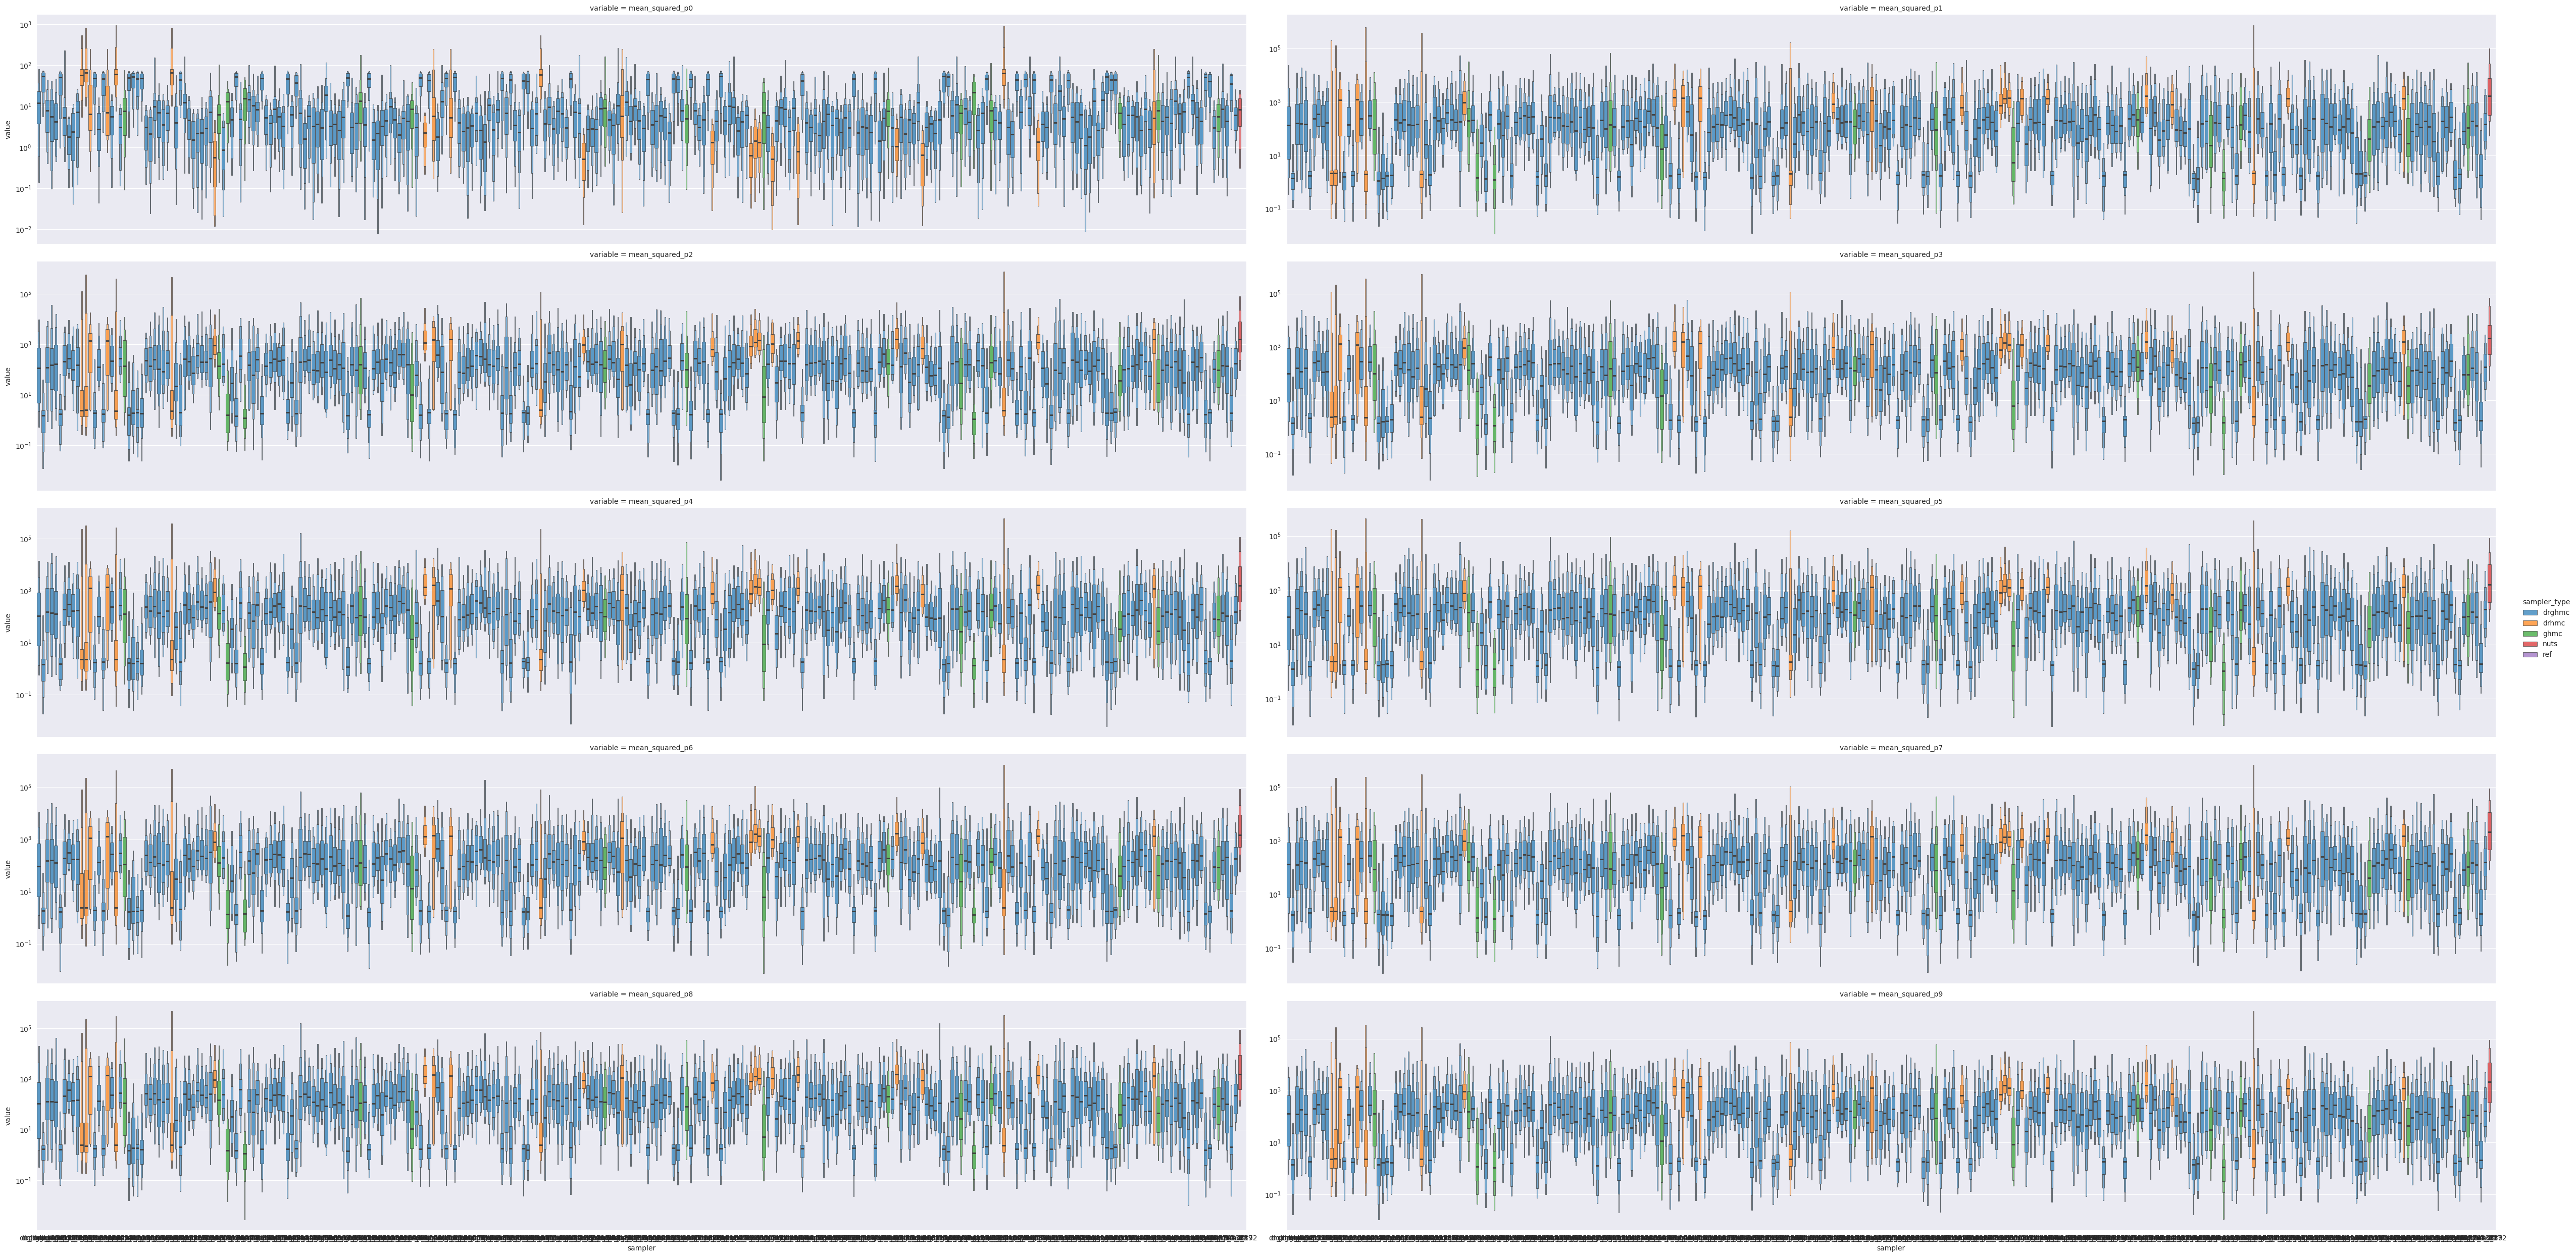

In [13]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_squared_p{i}" for i in range(num_params)]
id_vars = [col for col in squared_error.columns if col not in value_vars]

samples_melted = squared_error.melt(id_vars=id_vars, value_vars=value_vars)

### point plot ###
# fig = sns.catplot(
#     kind="point",
#     data=samples_melted.to_pandas(),
#     x="sampler",
#     y="value",
#     hue="sampler_type",
#     estimator="median",
#     errorbar=("pi", 75),
#     seed=1234,
#     col="variable",
#     col_wrap=1,
#     sharey=False,
#     sharex=True,
#     aspect=5,
#     col_order=[f"mean_squared_p{i}" for i in range(num_params)],
#     linestyle="none",
# )

### boxen plot ###
fig = sns.catplot(
    kind="boxen",
    data=samples_melted.to_pandas(),
    x="sampler",
    y="value",
    hue="sampler_type",
    col="variable",
    col_wrap=2,
    log_scale=True,
    sharey=False,
    aspect=5,
    showfliers=False,
    saturation=200,
    box_kws={"alpha": 0.7},
    line_kws={"linewidth": 2},
    # order categorical columns by their median "value" column
    # order=samples_melted.to_pandas().groupby(["sampler", "variable"]).median(numeric_only=True).sort_values("value").index,
)

In [48]:
# how many NaN values are in the dataframe "data"?
num_nan = data.isna().sum().sum()
num_nan

500

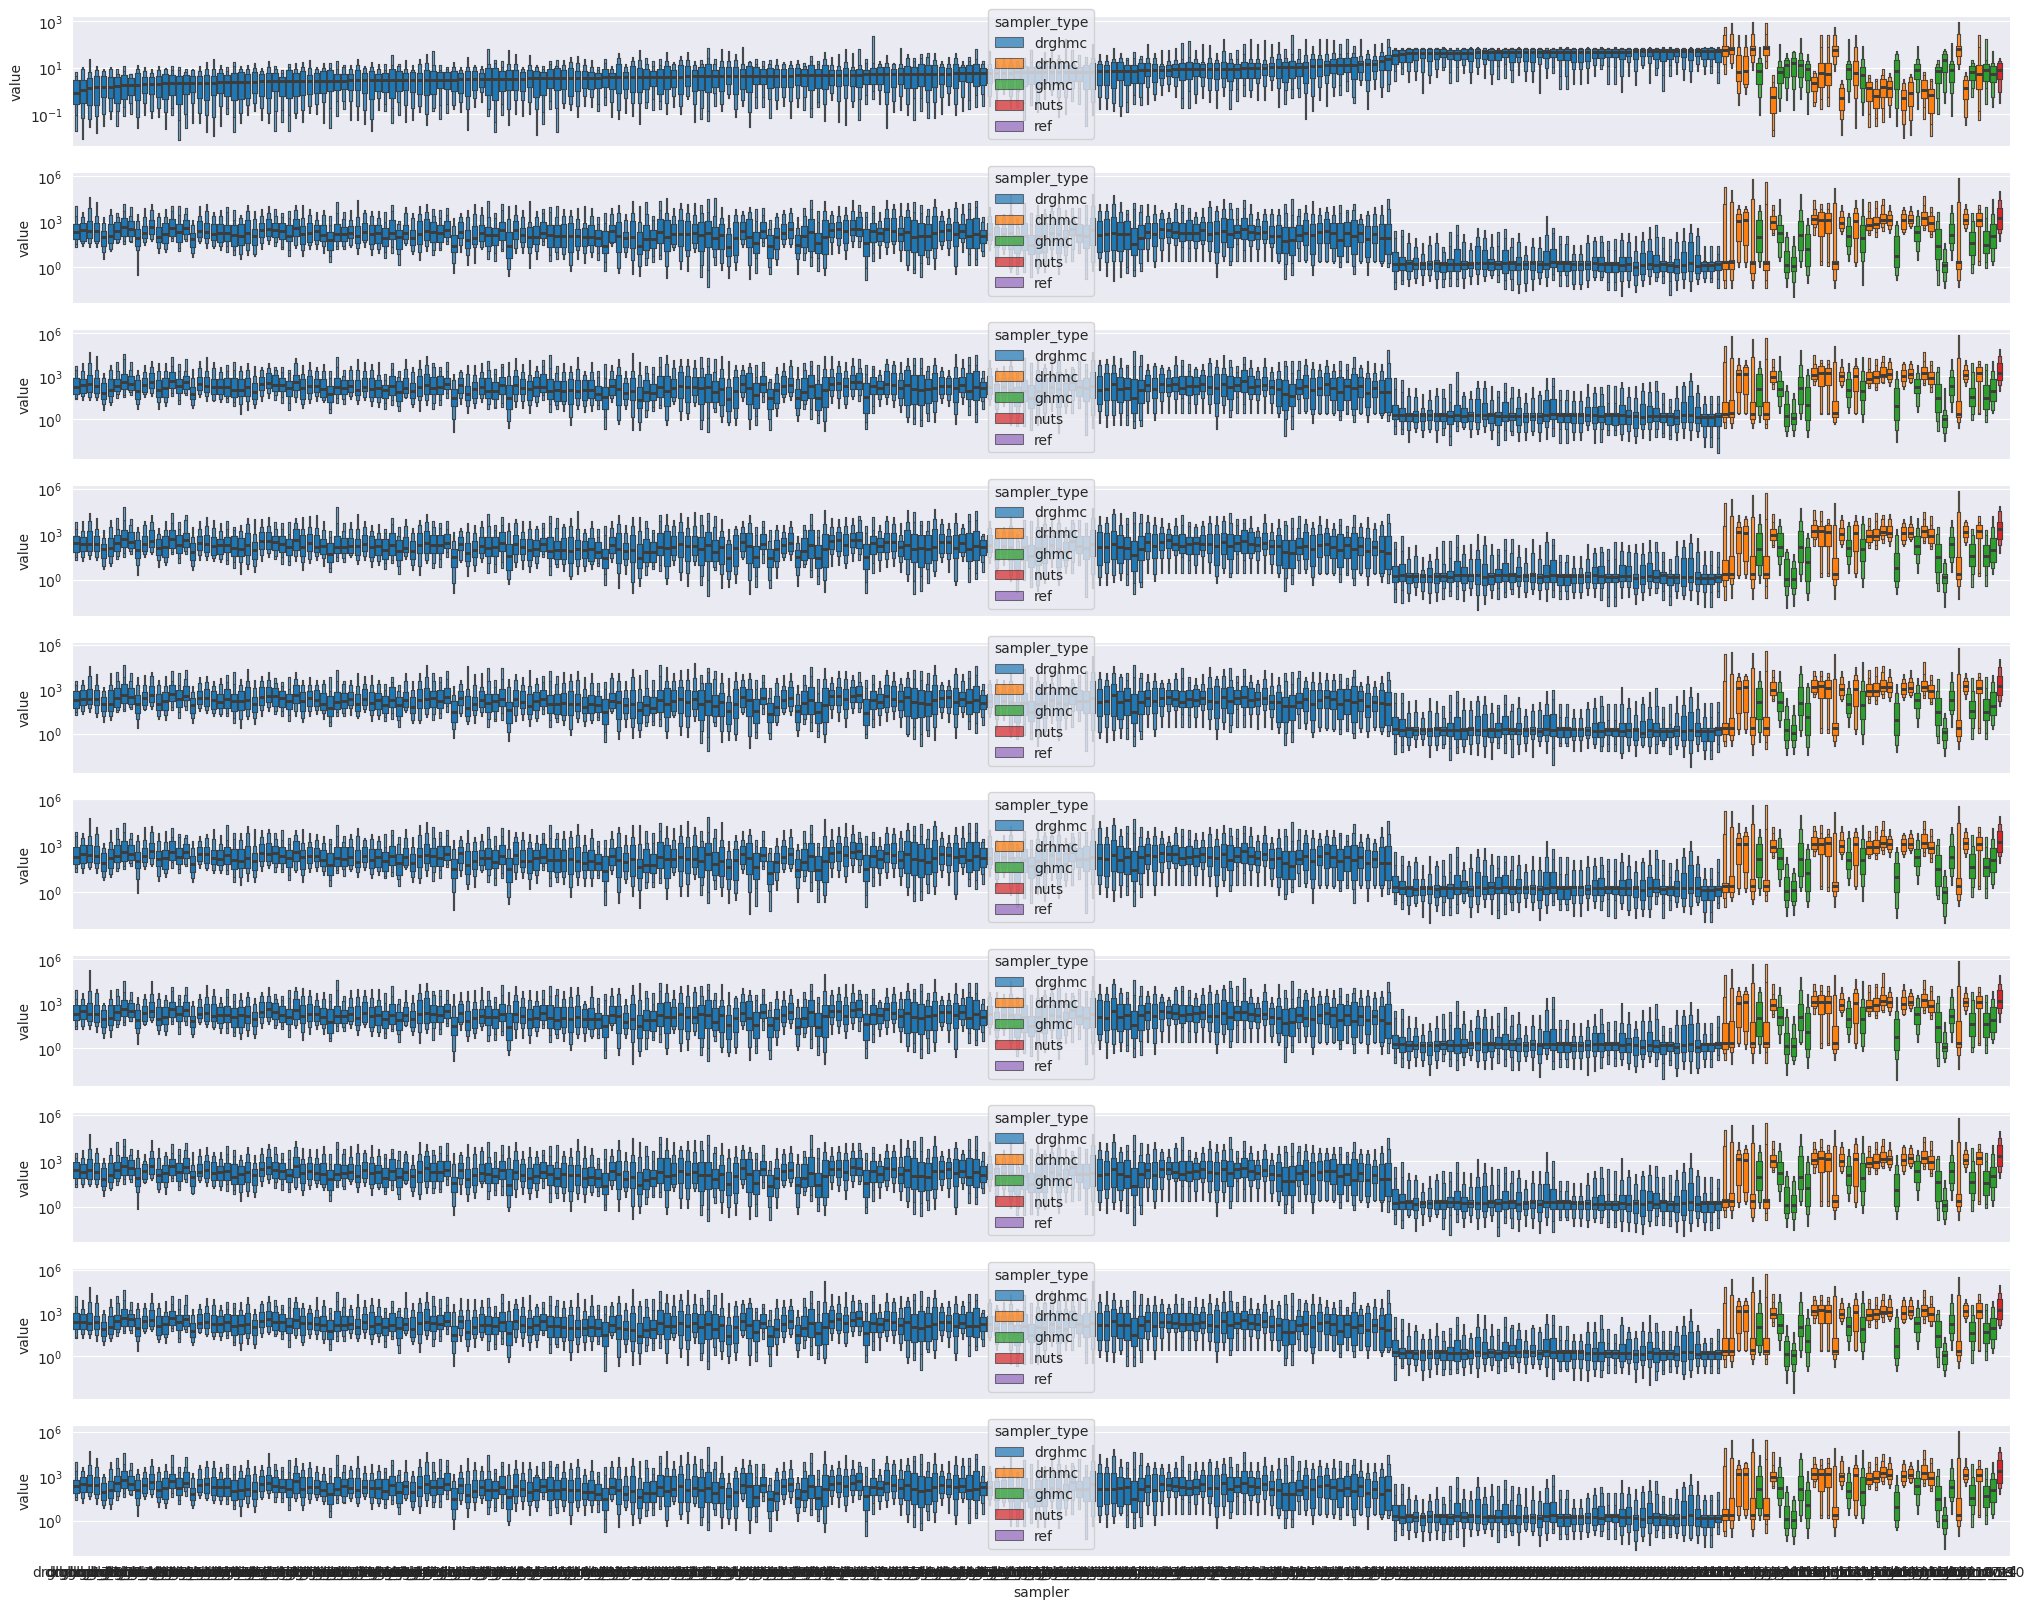

In [17]:
import matplotlib.pyplot as plt

# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_squared_p{i}" for i in range(num_params)]
id_vars = [col for col in squared_error.columns if col not in value_vars]

samples_melted = squared_error.melt(id_vars=id_vars, value_vars=value_vars)
# Convert samples_melted to a pandas DataFrame if necessary
samples_melted = samples_melted.to_pandas()

# Get the unique variables
variables = samples_melted["variable"].unique()

# Create a figure with a subplot for each variable
fig, axs = plt.subplots(len(variables), figsize=(25, 20), sharex=True)

# For each variable...
for i, variable in enumerate(variables):
    # ...filter the data for that variable
    data = samples_melted.loc[samples_melted["variable"] == variable]

    # Group the data by "sampler_type" and "sampler", and calculate the median of the "value" column
    medians = data.groupby(["sampler_type", "sampler"])["value"].median()

    # For each "sampler_type", sort the groups by their median value
    sorted_groups = medians.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values())

    # Extract the sorted "sampler" names
    sorted_samplers = sorted_groups.index.get_level_values(1).tolist()

    # Create a boxenplot for the variable, using the sorted sampler names to order the categories
    sns.boxenplot(
        ax=axs[i],
        data=data,
        x="sampler",
        y="value",
        hue="sampler_type",
        order=sorted_samplers,  # Use the sorted sampler names
        showfliers=False,
        log_scale=True,
        saturation=200,
        box_kws={"alpha": 0.7},
        line_kws={"linewidth": 2},
        dodge=False,
    )
    
# Show the plot
fig.show()

In [ ]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_squared_p{i}" for i in range(num_params)]
id_vars = [col for col in squared_error.columns if col not in value_vars]

samples_melted = squared_error.melt(id_vars=id_vars, value_vars=value_vars)

grouped_df = samples_melted.group_by(["sampler", "variable"]).agg(
    [
        pl.col("value").median().alias("median"),
        pl.col("value").quantile(0.75).alias("pi_plus"),
        pl.col("value").quantile(0.25).alias("pi_minus"),
    ]
)

df = samples_melted.join(grouped_df, on="sampler")
df = df.sort("median")

fig = px.scatter(
    data_frame=df.to_pandas(),
    x="sampler",
    y="median",
    error_y="pi_plus",
    error_y_minus="pi_minus",
    color="sampler_type",
    facet_col="variable_right",
    facet_col_wrap=2,
    # hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "std_dev"],
    # range_y=[-5, 5],
    height=1800,
    log_y=True,
    category_orders={
        "variable_right": [f"mean_squared_p{i}" for i in range(num_params)],
        "sampler_type": ["ghmc", "drhmc", "drghmc", "nuts"]
    },
    labels={
        "median": "squared error"
    },
    title="Accuracy of Parameters Squared<br><sup>Squared Error between Estimated Parameters Squared and True Parameters Squared</sup>"
)

fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.for_each_xaxis(lambda x: x.update(showticklabels=True,matches=None))
fig.show()

/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


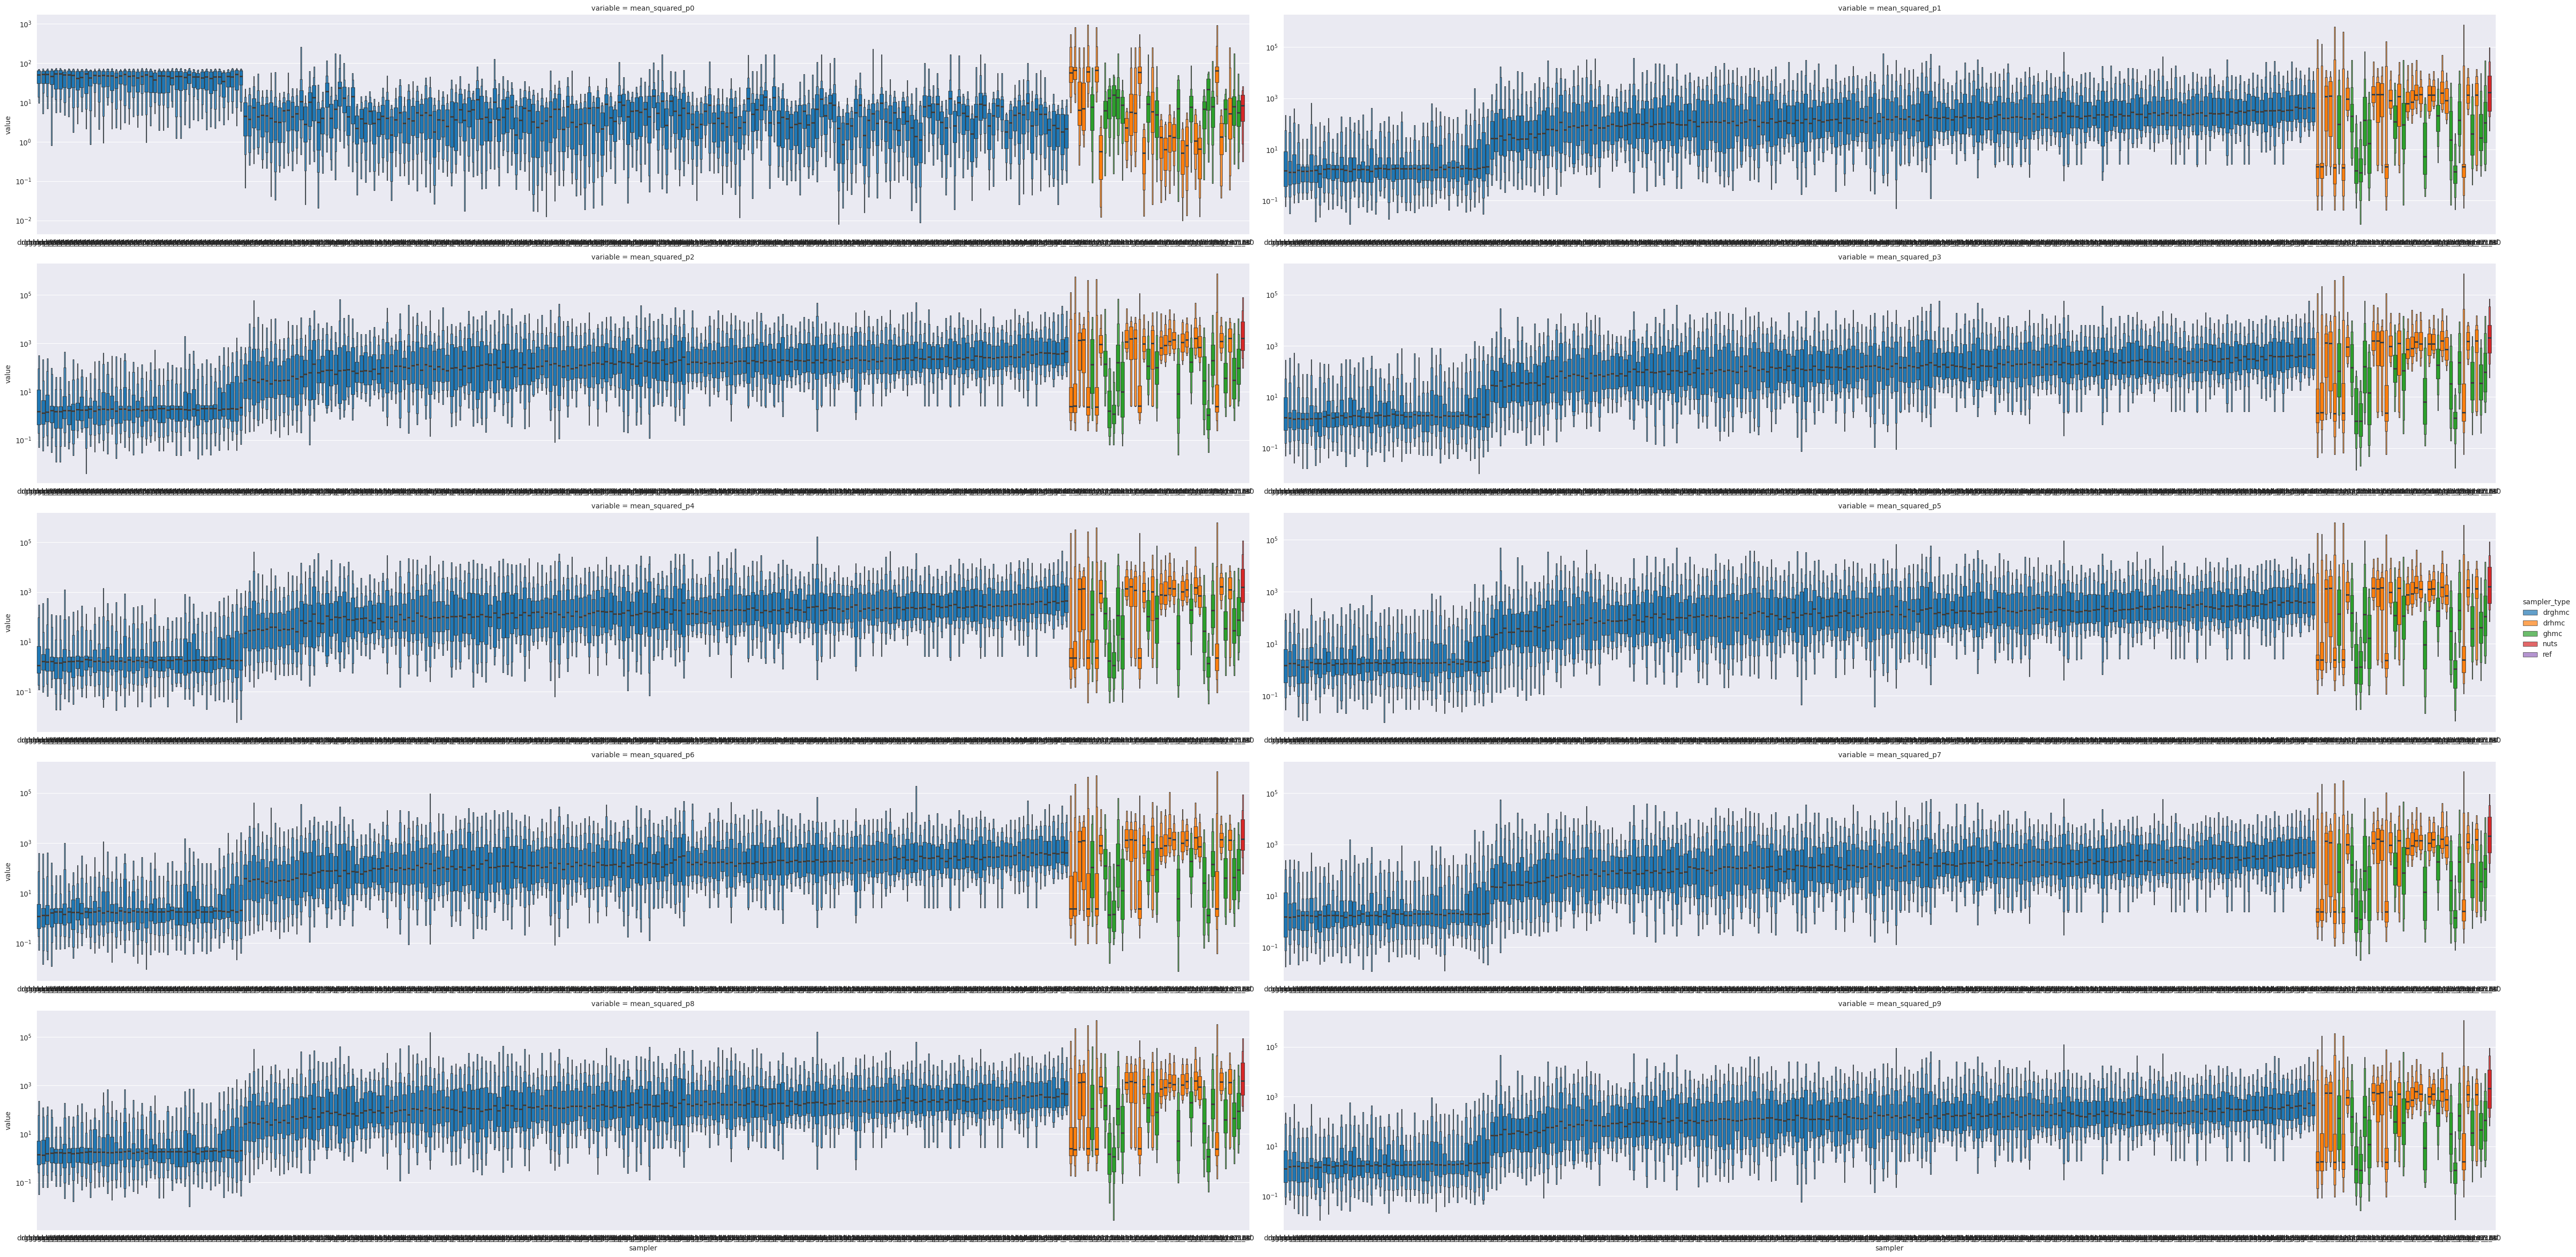

In [23]:
# Step 1: Group the data by "sampler_type" and "sampler"
grouped = samples_melted.to_pandas().groupby(["sampler_type", "sampler"])

# Step 2: Calculate the median of the "value" column for each group
medians = grouped["value"].median()

# Step 3: For each "sampler_type", sort the groups by their median value
sorted_groups = medians.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values())

# Step 4: Extract the sorted "sampler" names for each "sampler_type"
sorted_samplers = sorted_groups.index.get_level_values(1).tolist()

# Step 5: Use these sorted names to order the categories in the plot
fig = sns.catplot(
    kind="boxen",
    data=samples_melted.to_pandas(),
    x="sampler",
    y="value",
    hue="sampler_type",
    col="variable",
    col_wrap=2,
    log_scale=True,
    sharey=False,
    sharex=False,
    aspect=5,
    showfliers=False,
    saturation=200,
    box_kws={"alpha": 0.7},
    line_kws={"linewidth": 2},
    order=sorted_samplers,  # Use the sorted sampler names
)

### 2. Efficiency Evaluation

In [30]:
# non-parameter cols
non_parameter_cols = [
    "sampler",
    "chain",
    "sampler_type",
    "init_stepsize",
    "reduction_factor",
    "steps",
    "dampening",
    "num_proposals",
    "probabilistic",
    "grad_evals",
]

# convert to pandas dataframe
samples_pd = samples.to_pandas()

# first get the ref row
ref = samples_pd[samples_pd["sampler_type"] == "ref"]

# remove the ref row from grouped_samplers
samples_pd = samples_pd[samples_pd["sampler_type"] != "ref"]

# then drop the non-parameter cols
ref = ref.drop(non_parameter_cols, axis=1)

# Identify common columns
common_cols = ref.columns.intersection(samples_pd.columns)

ref = ref.mean(axis=0)

# Perform subtraction only on common columns
for col in common_cols:
    squared_std = samples_pd[col].var()
    squared_error = samples_pd[col].sub(ref[col]).pow(2)
    ess = squared_std / squared_error
    samples_pd[col] = ess / samples_pd["grad_evals"]

ess_df = pl.from_pandas(samples_pd)

ess_df.head()

sampler,chain,sampler_type,init_stepsize,reduction_factor,steps,dampening,num_proposals,probabilistic,grad_evals,mean_p0,mean_p1,mean_p2,mean_p3,mean_p4,mean_p5,mean_p6,mean_p7,mean_p8,mean_p9,mean_squared_p0,mean_squared_p1,mean_squared_p2,mean_squared_p3,mean_squared_p4,mean_squared_p5,mean_squared_p6,mean_squared_p7,mean_squared_p8,mean_squared_p9
cat,u8,cat,f32,f64,str,f32,f64,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""drghmc_40""",0,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,389435.0,0.000003,0.000103,0.00004,0.000086,0.000255,0.000962,0.000012,0.000041,0.000127,0.000024,0.002955,0.000074,0.001883,0.002235,0.000238,0.003291,0.000213,0.000201,0.000689,0.01806
"""drghmc_40""",1,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,600001.0,1.0058e-7,0.00011,0.000213,0.000109,0.000043,0.000455,0.000135,0.00021,0.000102,0.000102,1.1171e-7,0.127022,0.791779,1.291283,1.034423,1.840402,0.372755,0.48099,1.283169,43.424332
"""drghmc_40""",2,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,539881.0,0.000002,0.004183,0.000022,0.000029,0.000076,0.000072,0.000046,9.8788e-7,0.000022,0.000185,0.000047,0.00001,0.000225,0.000552,0.000073,0.000646,0.000032,0.000008,0.000415,0.002482
"""drghmc_40""",3,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,90482.0,0.000004,0.000128,0.000524,0.000115,187.301039,0.023071,0.003772,0.001343,0.02744,0.211686,0.000126,0.000461,0.005181,0.011816,0.007369,0.01085,0.001907,0.001224,0.009506,0.138261
"""drghmc_40""",4,"""drghmc""",10.0,2.0,"""const_traj_len…",0.01,3.0,false,482967.0,0.001288,0.006028,0.005577,0.012665,0.00703,0.34884,0.015183,0.004282,0.012269,0.001763,0.000004,0.011799,0.095268,0.069723,0.044324,0.095411,0.012134,0.028109,0.017338,0.88888


In [ ]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_p{i}" for i in range(num_params)]
id_vars = [col for col in ess_df.columns if col not in value_vars]

samples_melted = ess_df.melt(id_vars=id_vars, value_vars=value_vars)

grouped_df = samples_melted.group_by(["sampler", "variable"]).agg(
    [
        pl.col("value").mean().alias("mean"),
        pl.col("value").std().alias("std_dev"),
    ]
)

df = samples_melted.join(grouped_df, on="sampler").sort("mean")

fig = px.scatter(
    data_frame=df.to_pandas(),
    x="sampler",
    y="mean",
    error_y="std_dev",
    color="sampler_type",
    facet_col="variable_right",
    facet_col_wrap=2,
    hover_data=["std_dev"],
    # hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "std_dev"],
    range_y=[-500, 500],
    height=1500,
    labels={"mean": "ESS / grad evals"},
    category_orders={
        "variable_right": [f"mean_p{i}" for i in range(num_params)],
        # "sampler": df.sort("mean")["sampler"].to_list(),
    },
)

fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.for_each_xaxis(lambda x: x.update(showticklabels=True,matches=None))
fig.show()

In [ ]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_squared_p{i}" for i in range(num_params)]
id_vars = [col for col in ess_df.columns if col not in value_vars]

samples_melted = ess_df.melt(id_vars=id_vars, value_vars=value_vars)

grouped_df = samples_melted.group_by(["sampler", "variable"]).agg(
    [
        pl.col("value").mean().alias("mean"),
        pl.col("value").std().alias("std_dev"),
    ]
)

df = samples_melted.join(grouped_df, on="sampler").sort("mean")

fig = px.scatter(
    data_frame=df.to_pandas(),
    x="sampler",
    y="mean",
    error_y="std_dev",
    color="sampler_type",
    facet_col="variable_right",
    facet_col_wrap=2,
    hover_data=["std_dev"],
    # hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "std_dev"],
    range_y=[-1500, 1500],
    height=1500,
    labels={"mean": "ESS / grad evals"},
    category_orders={
        "variable_right": [f"mean_squared_p{i}" for i in range(num_params)],
        # "sampler": df.sort("mean")["sampler"].to_list(),
    },
)

# fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.for_each_xaxis(lambda x: x.update(showticklabels=True,matches=None))
fig.show()

# Most-Difficult Model Parameter with Transformed Summary Statistics

In [ ]:
samplers_1p = squared_error

# Assuming mean_cols is a list of your column names
mean_cols = [f"mean_p{i}" for i in range(num_params)]

# Compute the maximum across the specified columns
samplers_1p = samplers_1p.with_columns(
    pl.max_horizontal(mean_cols).alias("squared error")
)


# convert to Pandas
samplers_1p = samplers_1p.to_pandas()

# remove unused categories for "sampler_type" column
samplers_1p["sampler_type"] = samplers_1p["sampler_type"].cat.remove_unused_categories()

# convert back to Polars
samplers_1p = pl.from_pandas(samplers_1p)

samplers_1p.head()

In [ ]:
fig = px.scatter(
    data_frame=samplers_1p.to_pandas(),
    x="sampler",
    y="squared error",
    color="sampler_type",
    log_y=True,
    hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic"],
    title=r"Error of Parameters",
)

fig.show()

In [ ]:
samplers_1p = squared_error

# Assuming mean_cols is a list of your column names
mean_cols = [f"mean_squared_p{i}" for i in range(num_params)]

# Compute the maximum across the specified columns
samplers_1p = samplers_1p.with_columns(
    pl.max_horizontal(mean_cols).alias("squared error")
)


# convert to Pandas
samplers_1p = samplers_1p.to_pandas()

# remove unused categories for "sampler_type" column
samplers_1p["sampler_type"] = samplers_1p["sampler_type"].cat.remove_unused_categories()

# convert back to Polars
samplers_1p = pl.from_pandas(samplers_1p)

samplers_1p.head()

In [ ]:
# add latex title to plotly graph

fig = px.scatter(
    data_frame=samplers_1p.to_pandas(),
    x="sampler",
    y="squared error",
    color="sampler_type",
    log_y=True,
    hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic"],
    title=r"Error of Parameters Squared",
)
fig.show()